In [34]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('Downloads/pokemonDT'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import glob
import cv2
import plotly.express as px
import plotly as plotly
import plotly.graph_objs as go
import pandas as pd


Downloads/pokemonDT\DataSet\pokemon\pokemon\1.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\10.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\100.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\101.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\102.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\103.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\104.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\105.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\106.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\107.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\108.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\109.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\11.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\110.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\111.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\112.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\113.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\114.png
Downloads/pokemonDT\DataSet\pokemon\pokemon\115-mega.png
Downloads/p

Downloads/pokemonDT\images\images\abomasnow.png
Downloads/pokemonDT\images\images\abra.png
Downloads/pokemonDT\images\images\absol.png
Downloads/pokemonDT\images\images\accelgor.png
Downloads/pokemonDT\images\images\aegislash-blade.png
Downloads/pokemonDT\images\images\aerodactyl.png
Downloads/pokemonDT\images\images\aggron.png
Downloads/pokemonDT\images\images\aipom.png
Downloads/pokemonDT\images\images\alakazam.png
Downloads/pokemonDT\images\images\alomomola.png
Downloads/pokemonDT\images\images\altaria.png
Downloads/pokemonDT\images\images\amaura.png
Downloads/pokemonDT\images\images\ambipom.png
Downloads/pokemonDT\images\images\amoonguss.png
Downloads/pokemonDT\images\images\ampharos.png
Downloads/pokemonDT\images\images\anorith.png
Downloads/pokemonDT\images\images\araquanid.jpg
Downloads/pokemonDT\images\images\arbok.png
Downloads/pokemonDT\images\images\arcanine.png
Downloads/pokemonDT\images\images\arceus.png
Downloads/pokemonDT\images\images\archen.png
Downloads/pokemonDT\imag

ModuleNotFoundError: No module named 'plotly'

In [35]:
pokemons = pd.read_csv('Downloads/pokemonDT/images/pokemon.csv')
numbers = []
for i in range(1,pokemons.shape[0]+1):
    numbers.append(i)
pokemons['pkn'] = numbers
IMG_DIR = 'Downloads/pokemonDT/DataSet/pokemon/pokemon'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]

In [36]:
import re
dataframe_img = pd.DataFrame([])
images = []
pokemon_number = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        n = re.sub("[^0-9]", "", pkn[0])
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_number.append(n)
dataframe_img['images'] = images
dataframe_img['pkn'] = pokemon_number
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
result = pokemons.merge(dataframe_img, left_on='pkn', right_on='pkn')
result.head()


,Name,Type1,Type2,pkn,images
0,bulbasaur,Grass,Poison,1,Downloads/pokemonDT/DataSet/pokemon/pokemon/1.png
1,ivysaur,Grass,Poison,2,Downloads/pokemonDT/DataSet/pokemon/pokemon/2.png
2,venusaur,Grass,Poison,3,Downloads/pokemonDT/DataSet/pokemon/pokemon/3.png
3,charmander,Fire,NaN,4,Downloads/pokemonDT/DataSet/pokemon/pokemon/4.png
4,charmeleon,Fire,NaN,5,Downloads/pokemonDT/DataSet/pokemon/pokemon/5.png


In [83]:
import plotly.graph_objs as go
select = ['Water', 'Fire']
result = result[result['Type1'].isin(select)]
fig = go.Figure()

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[0]],
                     y=[result['Type1'].value_counts()[0]],
                     marker_color='blue',
                     name='water'
                     ))

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[1]],
                     y=[result['Type1'].value_counts()[1]],
                     marker_color='red',
                     name='fire'
                    ))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Pokemon Distribution',
        'width': 500, 
        'height': 400
})
fig.show()

NameError: name 'go' is not defined

In [38]:
import os
from shutil import copyfile
os.mkdir('train/')
os.mkdir('test/')
os.mkdir('val/')
for class_ in result['Type1'].unique():
    os.mkdir('train/'+str(class_)+'/')
    os.mkdir('test/'+str(class_)+'/')
    os.mkdir('val/'+str(class_)+'/')

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    result, result['Type1'],test_size=0.33, stratify=result['Type1'])

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.33,stratify=y_test)

In [40]:
from shutil import copyfile, copy2

for image,type_  in zip(X_train['images'], y_train):
    copy2(image, 'train/'+type_)

for image,type_ in zip(X_test['images'], y_test):
    copy2(image, 'test/'+type_)
    
for image,type_ in zip(X_val['images'], y_val):
    copy2(image, 'val/'+type_)

In [41]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train = datagen.flow_from_directory('train/')
test = datagen.flow_from_directory('test/')
val = datagen.flow_from_directory('val/')

Found 100 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator

def build():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) 

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    model.summary()
    return model
model = build()
history = model.fit_generator(test, epochs=40, validation_data=val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 255, 255, 32)      416       
                                                                 
 batch_normalization_4 (Batc  (None, 255, 255, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 84, 84, 64)       

<ipython-input-42-283053025cf8>:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(test, epochs=30, validation_data=val)


Epoch 1/30
2/2 [==============================] - 3s 2s/step - loss: 0.8715 - acc: 0.5455 - val_loss: 14.3589 - val_acc: 0.3529
Epoch 2/30
2/2 [==============================] - 2s 361ms/step - loss: 0.4701 - acc: 0.8485 - val_loss: 17.0195 - val_acc: 0.2941
Epoch 3/30
2/2 [==============================] - 2s 2s/step - loss: 0.1505 - acc: 1.0000 - val_loss: 16.3421 - val_acc: 0.2941
Epoch 4/30
2/2 [==============================] - 2s 2s/step - loss: 0.1262 - acc: 0.9394 - val_loss: 13.0294 - val_acc: 0.3529
Epoch 5/30
2/2 [==============================] - 2s 452ms/step - loss: 0.1102 - acc: 1.0000 - val_loss: 14.1648 - val_acc: 0.4118
Epoch 6/30
2/2 [==============================] - 2s 2s/step - loss: 0.0568 - acc: 1.0000 - val_loss: 14.1287 - val_acc: 0.4118
Epoch 7/30
2/2 [==============================] - 2s 2s/step - loss: 0.0535 - acc: 1.0000 - val_loss: 12.8605 - val_acc: 0.4118
Epoch 8/30
2/2 [==============================] - 2s 2s/step - loss: 0.0652 - acc: 1.0000 - val_lo

In [43]:
predict = model.predict(test)

In [44]:
fig = go.Figure()
epochs = []
for i in range(len(history.history['acc'])):
    epochs.append(i)
fig.add_trace(go.Scatter(x=epochs,y=history.history['acc'], mode='lines',name='train'))
fig.add_trace(go.Scatter(x=epochs,y=history.history['val_acc'], mode='lines',name='val'))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 500, 
        'height': 400

})
fig.show()

NameError: name 'go' is not defined

In [45]:
from sklearn.metrics import classification_report
predict_frame = pd.DataFrame([])
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category']))

              precision    recall  f1-score   support

        Fire       0.18      0.18      0.18        11
       Water       0.59      0.59      0.59        22

    accuracy                           0.45        33
   macro avg       0.39      0.39      0.39        33
weighted avg       0.45      0.45      0.45        33



In [46]:
def show_wrong_classification(y_test, predict, result):
    tmp = result[result.index.isin(y_test.index)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
    i=0
    for imag, true, pred in zip(tmp['images'], tmp['Type1'], predict):
        if true!=pred:
            if i <3:
                img = Image.open(imag)
                fig = plt.figure()
                ax[i].imshow(img)
                ax[i].set_title(str(pred))
                i+=1

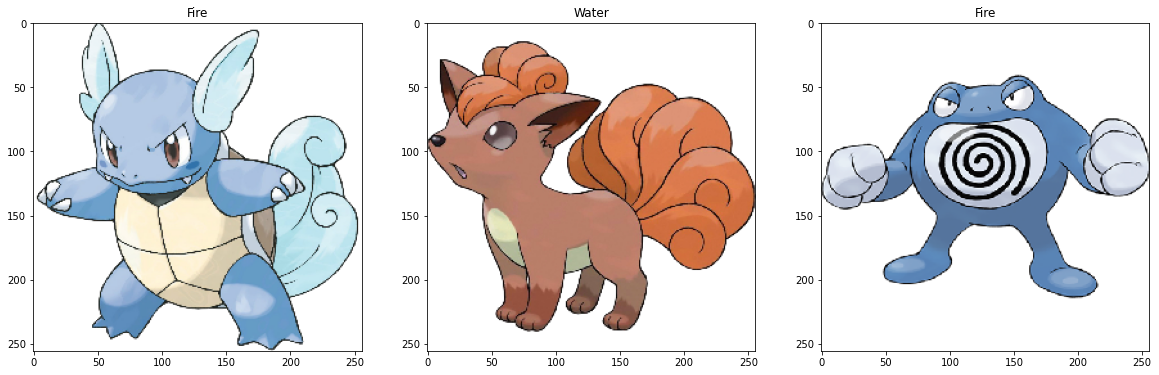

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [47]:
from PIL import Image
show_wrong_classification(y_test, predict_frame['category'], result)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please a

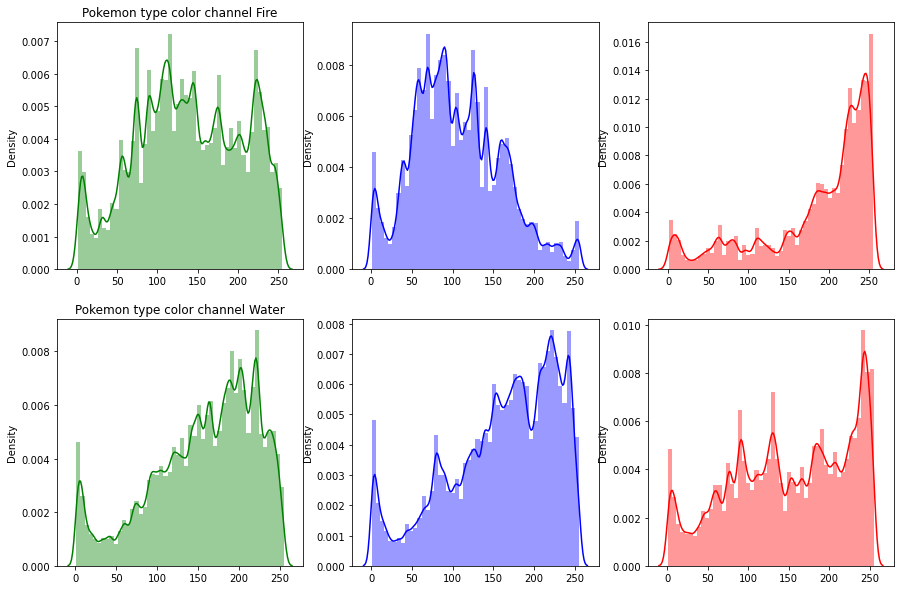

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3,figsize=(15,10))
k =0
import cv2
list_b =[]
list_r = []
list_g = []
from tqdm import tqdm
for type_ in tqdm(result['Type1'].unique()):
    tmp = result[result['Type1']==type_]
    for img in tmp['images']:
        img = cv2.imread(img)
        b, g, r = cv2.split(img)
        color = 'blue'
        for i in b:
            for j in i:
                if j != 0:
                    list_b.append(j)
        color = 'green'
        for i in g:
            for j in i:
                if j != 0:
                    list_g.append(j)
        color = 'red'
        for i in r:
            for j in i:
                if j != 0:
                    list_r.append(j)
    sns.distplot(list_g, ax=axes[k, 0], color='g')
    sns.distplot(list_b, ax=axes[k, 1], color='b')
    sns.distplot(list_r, ax=axes[k, 2], color='r')
    axes[k, 0].set_title('Pokemon type color channel ' + type_)
    if type_ =='Fire':
        list_g_f = list_g
        list_b_f = list_b
        list_r_f = list_r
    else:
        list_g_w = list_g
        list_b_w = list_b
        list_r_w = list_r
    list_b =[]
    list_r = []
    list_g = []
    
    k += 1

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

g_fire = np.std(np.array(list_g_f), axis=0)
r_fire = np.std(np.array(list_r_f), axis=0)
b_fire = np.std(np.array(list_b_f), axis=0)


g_water = np.std(np.array(list_g_w), axis=0)
r_water = np.std(np.array(list_r_w), axis=0)
b_water = np.std(np.array(list_b_w), axis=0)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Fire std channel","Water std channel"))
fig.add_trace(go.Scatter(
    y=[b_fire, g_fire, g_fire],
    x=['blue', 'green', 'red'],
    mode='markers',
    marker=dict(size=[b_fire, g_fire, r_fire],
                color=['blue', 'green', 'red'],
                showscale=True)
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=[b_water, g_water, r_water],
    x=['blue', 'green', 'red'],
    mode='markers',
    marker=dict(size=[b_water, g_water, r_water],
                color=['blue', 'green', 'red'],
                showscale=True)
), row=1, col=2)
fig.update_layout(showlegend=False)
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 850, 
        'height': 400

})
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [51]:
water = result[result['Type1']=='Water']
stds = []
values = []
for image in water['images']:
    img = cv2.imread(image)
    b, g, r = cv2.split(img)
    for i in r:
        for j in i:
            if j != 0:
                stds.append(j)       
    std = np.mean(np.array(stds), axis=0)
    values.append(std)
    stds = []
water['stds'] = values

<ipython-input-51-dce06db9b4c7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water['stds'] = values


In [66]:
water = water.sort_values(by='stds', ascending=True)

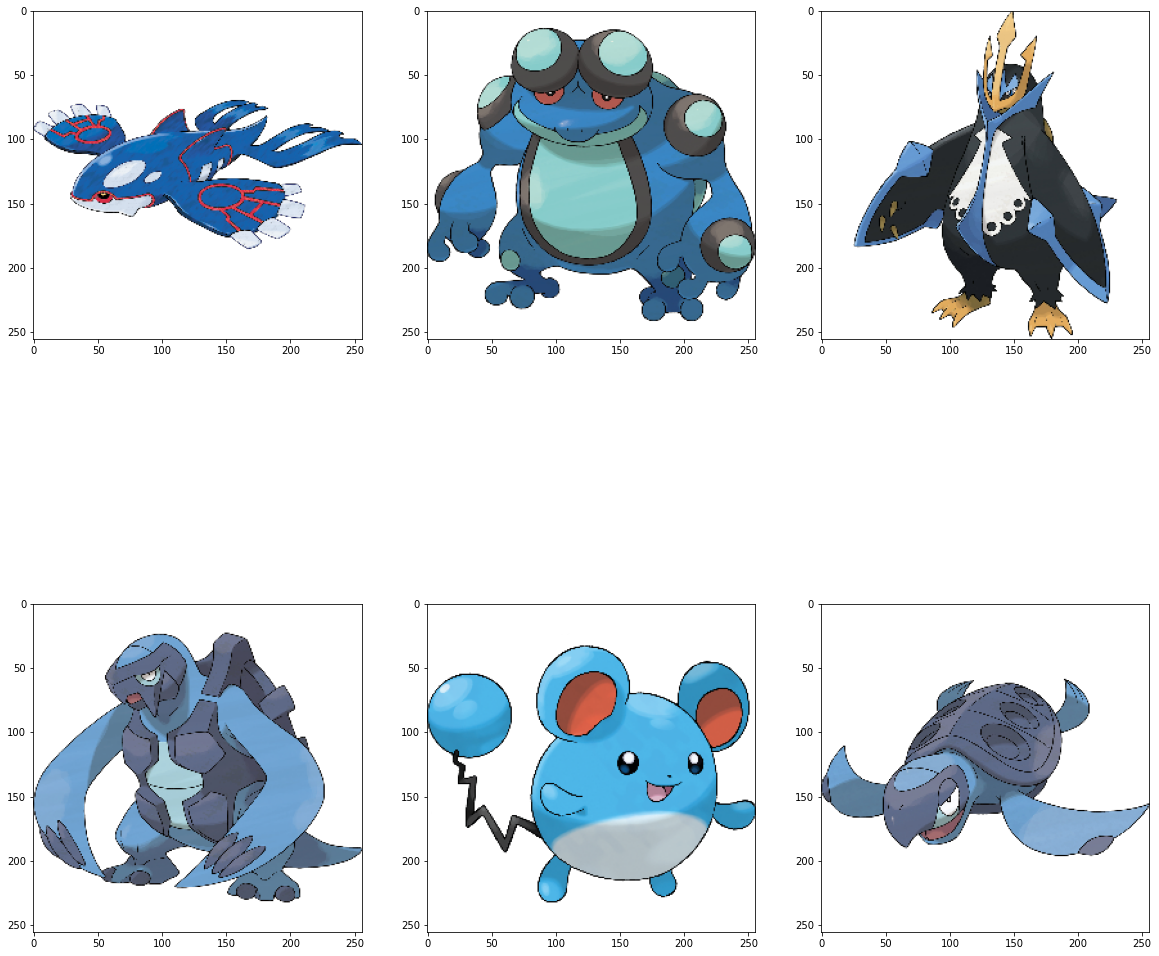

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [67]:
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for imag in water['images']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    img = Image.open(imag)
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

<ipython-input-79-f65832152148>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['stds'] = values


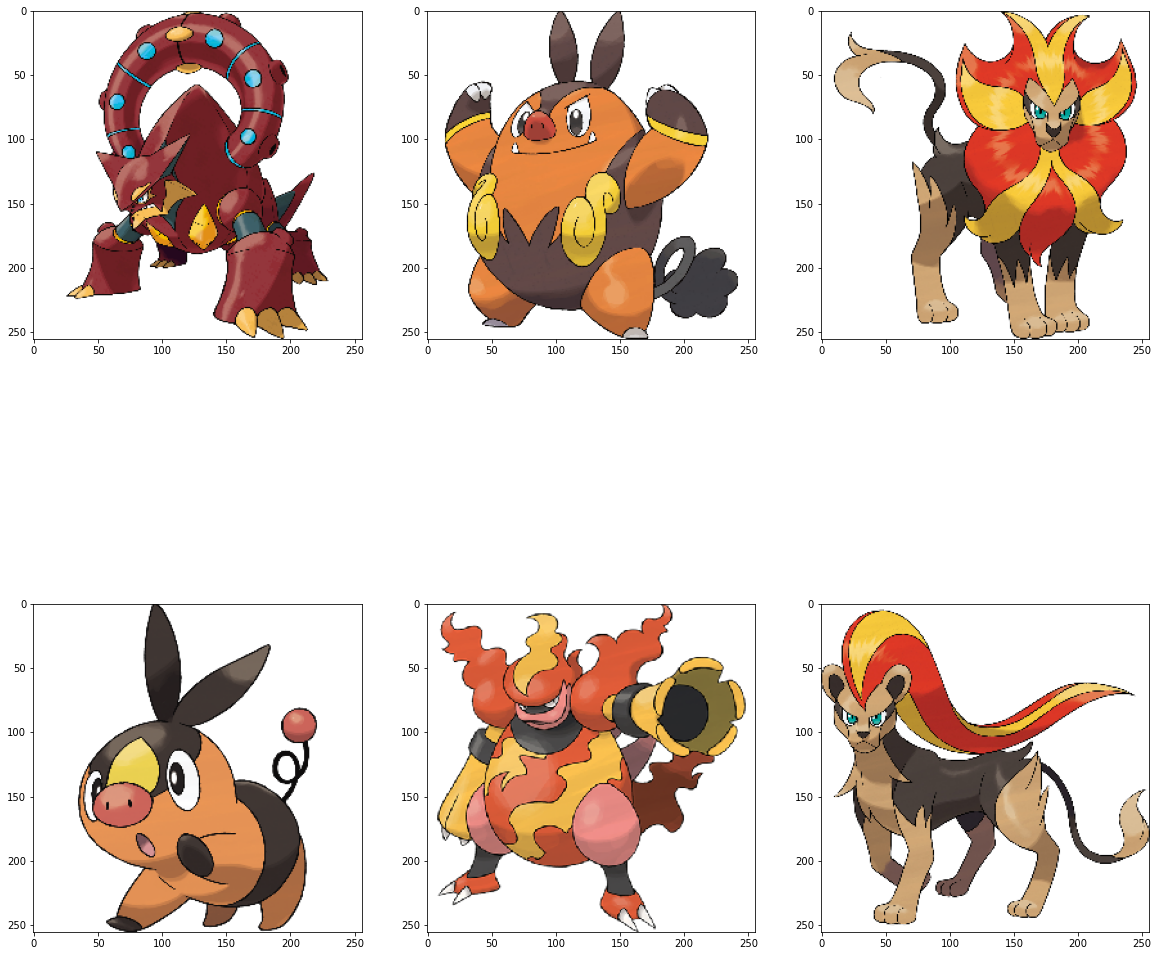

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [79]:
fire = result[result['Type1']=='Fire']
stds = []
values = []
for image in fire['images']:
    img = cv2.imread(image)
    b, g, r = cv2.split(img)
    for i in b:
        for j in i:
            if j != 0:
                stds.append(j)       
    std = np.mean(np.array(stds), axis=0)
    values.append(std)
    stds = []
fire['stds'] = values
fire = fire.sort_values(by='stds', ascending=True)
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for imag in fire['images']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    img = Image.open(imag)
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

In [81]:
model = build()
history = model.fit(train, epochs=40, validation_data=val)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 255, 255, 32)      416       
                                                                 
 batch_normalization_20 (Bat  (None, 255, 255, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 85, 85, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 85, 85, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 84, 84, 64)       

4/4 [==============================] - 7s 1s/step - loss: 0.1640 - acc: 0.9600 - val_loss: 0.5440 - val_acc: 0.7647
Epoch 40/40
4/4 [==============================] - 7s 2s/step - loss: 0.2812 - acc: 0.9100 - val_loss: 0.5208 - val_acc: 0.7647


In [82]:
results = model.evaluate(val)
print("val_loss, val_acc:  ", results)

1/1 [==============================] - 0s 309ms/step - loss: 0.5208 - acc: 0.7647
val_loss, val_acc:   [0.5208215117454529, 0.7647058963775635]
